## Task 4 - Clustering

Use PCA to reduce the dimensionality of the data to 2. You should use the dataset obtained after pre-processing and transformation from Task 3.1 without feature selection. Write a Python program to visualize the results of clustering the PCA-reduced dataset.

Markdown Question: How do you think the visualization will change if you used 3 PCA components?

<span style="font-weight:bold;">Save your response (program and markdown) as task4.ipynb.</span>

## <b style="color: blue;">A visualization should have a goal/question/hypothesis. Clarify this!</b>

In [20]:
import matplotlib.pyplot as plt 
from ipynb.fs.full.functions import (
    load_model, plot_class_split_of_values, reduce_pca_dimensionality,
    svc_classifier, 
)
from sklearn.cluster import KMeans

(16200, 512)
(5400, 512)
(16200,)
(5400,)


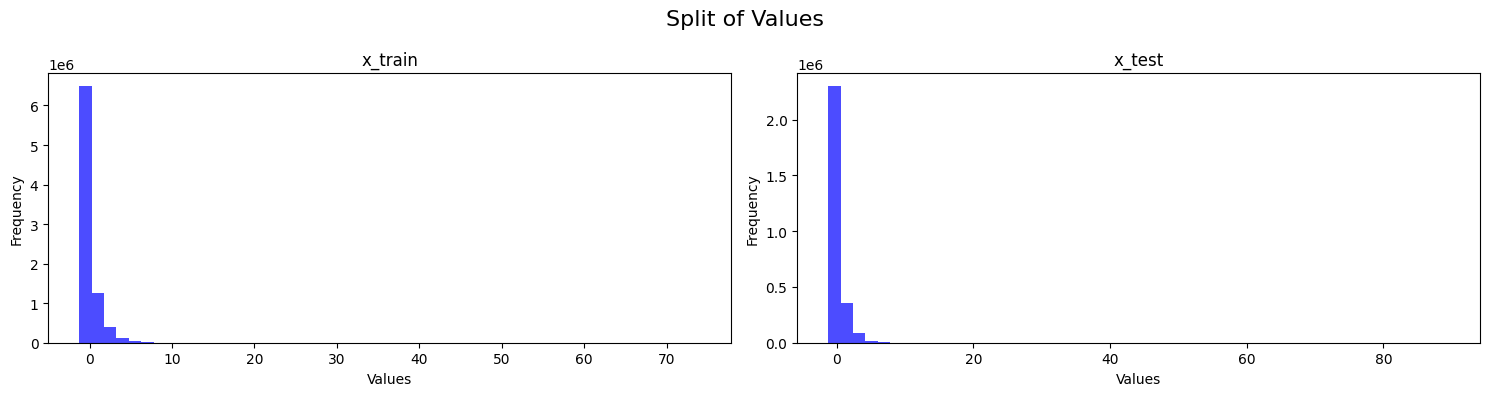

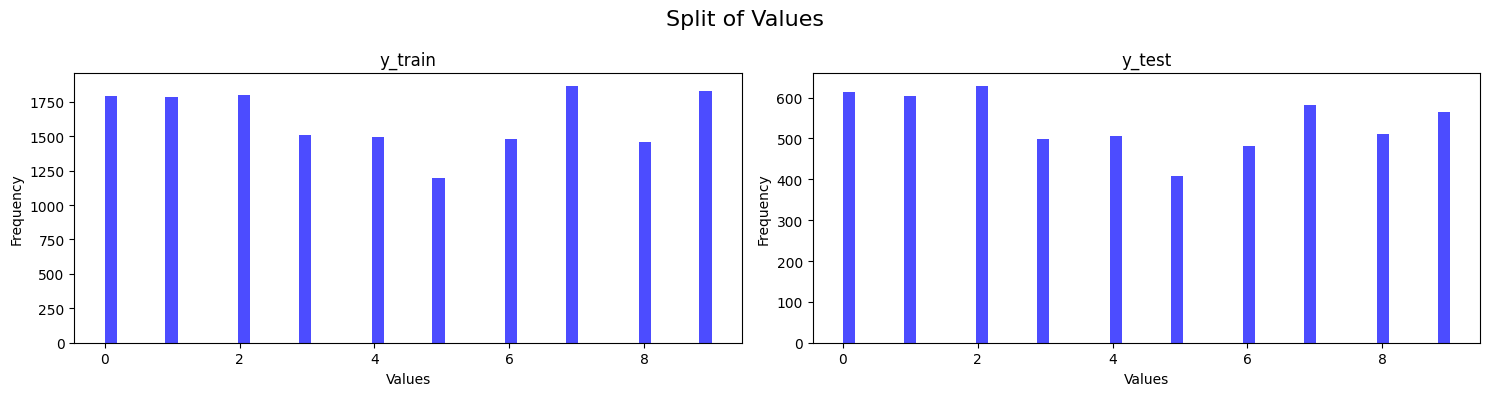

In [21]:
x_train_norm = load_model("datasets/saved_datasets/task1/x_train")
x_test_norm = load_model("datasets/saved_datasets/task1/x_test")
y_train_norm = load_model("datasets/saved_datasets/task1/y_train")
y_test_norm = load_model("datasets/saved_datasets/task1/y_test")

print(x_train_norm.shape)
print(x_test_norm.shape)
print(y_train_norm.shape)
print(y_test_norm.shape)

plot_class_split_of_values([x_train_norm, x_test_norm], ["x_train", "x_test"])
plot_class_split_of_values([y_train_norm, y_test_norm], ["y_train", "y_test"])

----
## Dimensionality Reduction 

It is used to reduce the amount of features
PCA is a dimensionality reduction technique (reducing data whilst keeping as much info as possible - mainly removes cols). 

How does dimensionality reduction differ from feature selection? -> Feature selection fetches only the most relevant variables whereas in dimensionality reduction, a smaller set of new variables are taken, each being a combination of the input variables, containing basically the same information as the input variables 

<h3 style="color:red">Check other dimensionality reduction methods</h3>

In [22]:
x_train_pca, x_test_pca = reduce_pca_dimensionality(x_train_norm, x_test_norm, 3)
print(x_train_pca.shape)
print(x_test_pca.shape)

(16200, 3)
(5400, 3)


----
## Clustering

In [14]:
km = KMeans(n_clusters=3, random_state=42)
clusters = km.fit_predict(x_train_pca)

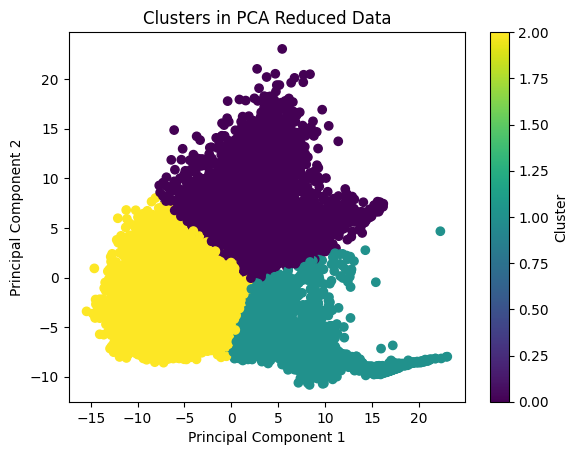

In [15]:
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters in PCA Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

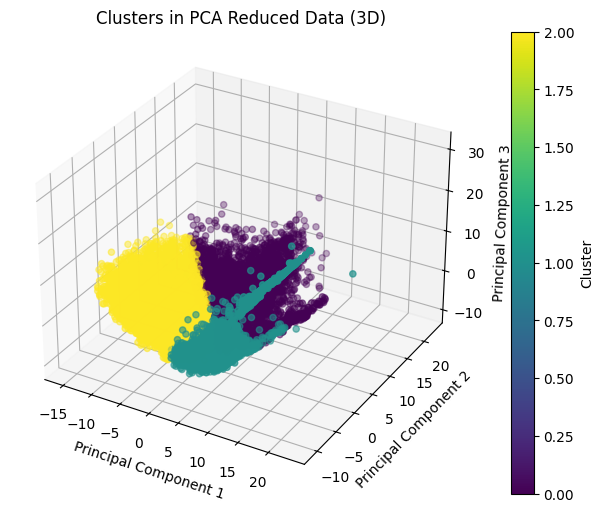

In [30]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x_train_pca[:, 0], x_train_pca[:, 1], x_train_pca[:, 2], c=clusters, cmap='viridis')
ax.set_title('Clusters in PCA Reduced Data (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(scatter, label='Cluster')
plt.show()

#### Finding the best K value

Finding the centroids of each cluster to calculate the SSE

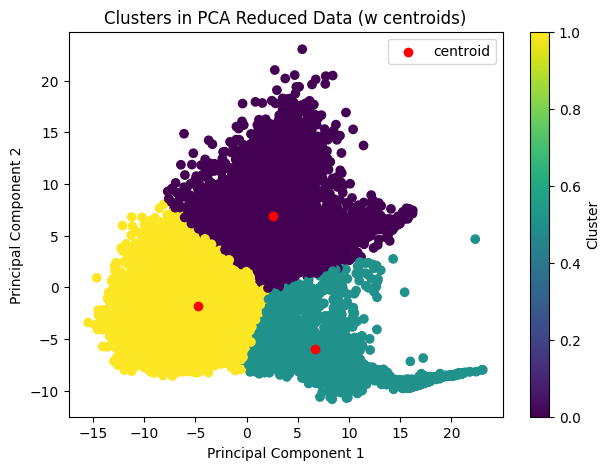

In [16]:
plt.figure(figsize=(7, 5))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=clusters, cmap='viridis')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color="red", marker="o", label='centroid')
plt.title('Clusters in PCA Reduced Data (w centroids)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

In [17]:
sse = []
k_range = range(1, 10)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x_train_pca)
    sse.append(km.inertia_)

print(sse)

[1167577.1991977915, 759441.1033465413, 411524.2985829947, 307910.25001454924, 239934.60645825515, 201159.9942006009, 182396.55452583538, 153227.97964996757, 132202.4325168701]


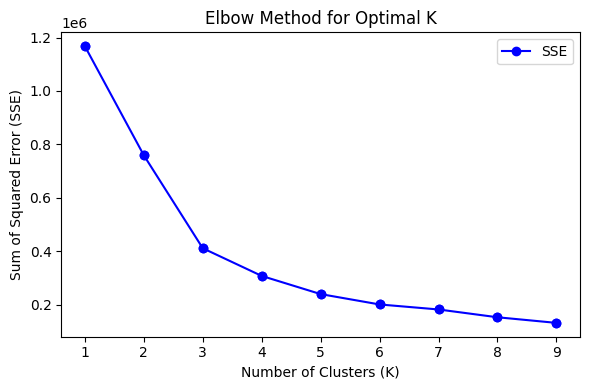

In [18]:
plt.figure(figsize=(6, 4))
plt.plot(k_range, sse, marker='o', linestyle='-', color='b', label='SSE')
plt.scatter(k_range, sse, color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.xticks(k_range)
plt.legend()
plt.tight_layout()
plt.show()

It can be seen K=3 is the ideal value ......

#### Finding the ideal # of PCs

Next, it needed to be seen what the ideal number of PCs were that captures majority of the variance (>80%) and to do that, a `Scree Plot` had to be created.

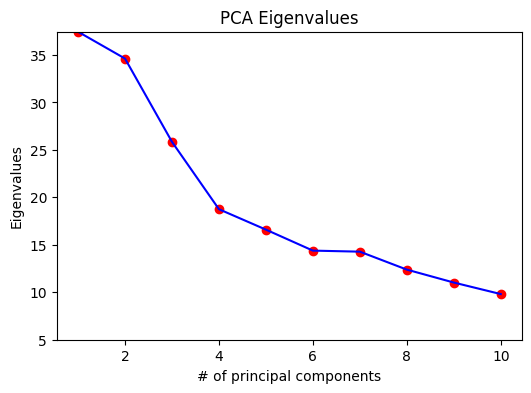

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(x_train_norm)

plt.figure(figsize=(6, 4))
plt.title("Scree Plot")
plt.xlabel('# of principal components')
plt.ylabel('Eigenvalues')
plt.ylim(5, max(pca.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.plot(range(1, 11), pca.explained_variance_, color='b', label='Eigenvalues')
plt.scatter(range(1, 11), pca.explained_variance_, color='r', marker='o', label='Eigenvalues (Scatter)')
plt.show()

----
<b>Markdown Question: How do you think the visualization will change if you used 3 PCA components?</b>

When 3 PCA components are used, the visualization will change to a 3D scatter plot, as there will be 3 principal components used for plotting. A 3D visualization can be useful as it could allow for more variance in the dataset, better represent the original dataset, and allow for better insights. Whilst a 3D visualisation may provide more insight with the newly added axis, it could create additional complexity with interpreting data and identifying the clusters.